In [3]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from scipy.stats import norm
from scipy import stats
%matplotlib inline

In [4]:
#so all DataFrame data is displayed
pd.set_option('display.max_columns',None)
pd.set_option('display.min_rows',0)
pd.set_option('display.max_rows',100)

## The Data

There are two data sets included in the data folder: `Ames_Housing_Price_Data.csv` and `Ames_Real_Estate_Data.csv`.

The `Ames_Housing_Price_Data.csv` set contains $81$ data columns, including the key feature **SalePrice** which will be used as the target of the predictive/descriptive modeling. $2580$ observations

The `Ames_Real_Estate_Data.csv` set contains $90$ data columns, including the key feature **Prop_Addr** which will be used to find the long-lat coordinates of the houses.

In [7]:
housing = pd.read_csv('./data/Ames_Housing_Price_Data.csv', index_col=0)
housing.shape

(2580, 81)

In [8]:
housing.head(2)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal


In [261]:
realestate = pd.read_csv('./data/Ames_Real_Estate_Data.csv', index_col=0)
realestate.shape

(22213, 90)

In [262]:
realestate.head(2)

,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,ClassSc_S,Legal_Pr,SchD_S,TxD_S,MA_Ownr1,MA_Ownr2,MA_Line1,MA_Line2,MA_City,MA_State,MA_Zip1,MA_Zip2,Rcrd_Yr,Rcrd_Mo,Inst1_No,Inst1_Yr,Inst1_Mo,Inst1TPr,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,ValType,X1TPr_D,X1TSc_D,X2TPr_D,X2TSc_D,X1TPr_S,X1TSc_S,X2TPr_S,X2TSc_S,LndAcX1S,ImpAcX1S,ImpAcX2S,HSTtl_D,MilVal_D,HSTtl_S,MilVal_S,AcreX_S1,AcreGr,AcreNt_S,Neighborhood,LotArea,ParType,BldgNo_S,DwlgNo_S,BldgType,YrBuilt,HouseStyle,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond,ParclRel,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
MapRefNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
520400001,520400001,0,0,4599 GEORGE W CARVER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD \nOUTLOT V\n AMES,5,45,HUNZIKER DEVELOPMENT GROUP LLC,NaN,105 S 16TH ST,NaN,AMES,IA,50010.0,NaN,2019.0,7.0,201906213,2019.0,7.0,NaN,481100,0,0,481100,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deed,4599,NaN,GEORGE W CARVER,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520440010,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD LOT:16 \n AMES,5,45,HUNZIKER DEVELOPMENT GROUP LLC,NaN,105 S 16TH ST,NaN,AMES,IA,50010.0,NaN,2019.0,7.0,201906213,2019.0,7.0,NaN,5700,0,0,5700,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deed,4507,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


## Exploration:

In [136]:
#seeing that there is one duplicate row in housing DF
sum(housing['PID'].value_counts() > 1)

1

In [137]:
#exploring duplicate row in housing dataset 
housing[housing['PID'] == 909276070]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
817,909276070,1717,194000,50,RL,80.0,12400,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1940,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Mn,BLQ,602.0,Unf,0.0,299.0,901.0,GasA,TA,Y,SBrkr,1125,592,0,0.0,0.0,1,1,2,1,TA,7,Typ,1,Gd,Attchd,1940.0,Unf,1.0,410.0,TA,TA,Y,0,0,0,0,113,0,NaN,NaN,NaN,0,2,2006,WD,Normal
1,909276070,1717,194000,50,RL,80.0,12400,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1940,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Mn,BLQ,602.0,Unf,0.0,299.0,901.0,GasA,TA,Y,SBrkr,1125,592,0,0.0,0.0,1,1,2,1,TA,7,Typ,1,Gd,Attchd,1940.0,Unf,1.0,410.0,TA,TA,Y,0,0,0,0,113,0,NaN,NaN,NaN,0,2,2006,WD,Normal


In [138]:
#removing deplicates
housing = housing.drop_duplicates(subset = ['PID'])
#checking
sum(housing['PID'].value_counts() > 1)

0

In [139]:
#Fill missing data
housing = housing.fillna(0.0)

## Trends in Data

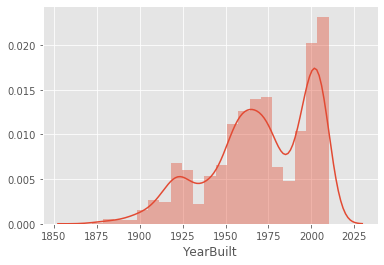

In [140]:
sns.distplot(housing.YearBuilt)
# YearBuilt of houses are not normally distributed. Local maximums around 1923, 1960, 2005.
# (every 40 years, a wave of new houses)

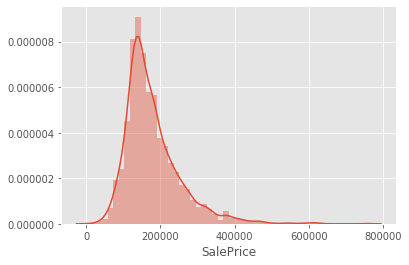

In [141]:
sns.distplot(housing.SalePrice)
# Sale price of houses in Ames are normally distributed with mean price around $178,000 and sd $75,000
# Right Skewed - There are probably outlier we would like to remove  

In [142]:
housing['SalePrice'].median()

159900.0

In [143]:
housing['SalePrice'].describe()

count      2579.000000
mean     178053.442420
std       75044.983207
min       12789.000000
25%      129950.000000
50%      159900.000000
75%      209750.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [144]:
#skewness and kurtosis
print("Skewness: %f" % housing['SalePrice'].skew())
print("Kurtosis: %f" % housing['SalePrice'].kurt())

Skewness: 1.760751
Kurtosis: 5.430411


count      2579.000000
mean     178053.442420
std       75044.983207
min       12789.000000
25%      129950.000000
50%      159900.000000
75%      209750.000000
max      755000.000000
Name: SalePrice, dtype: float64

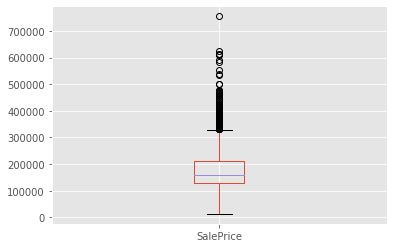

In [145]:
housing.SalePrice.plot(kind='box')
housing.SalePrice.describe()

Text(0.5, 1.0, 'Building Type Distribution')

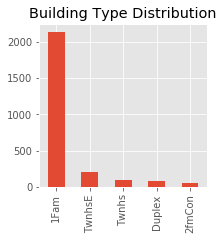

In [146]:
plt.figure(figsize=(3,3))
housing['BldgType'].value_counts().plot(kind='bar')
plt.title('Building Type Distribution')

In [147]:
housing.MSZoning.value_counts()
# decided to drop C I A
# keeping only residential property 

RL         2007
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

Text(0.5, 1.0, 'Distribution of Functional Features')

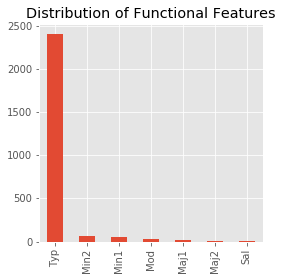

In [148]:
plt.figure(figsize=(4,4))
housing.Functional.value_counts().plot(kind='bar')
plt.title('Distribution of Functional Features')

# dropped housing with Moderate, Major or Salvage deductions

### Analyzing Monthly Sale Price

Text(0.5, 0, 'Month Sold')

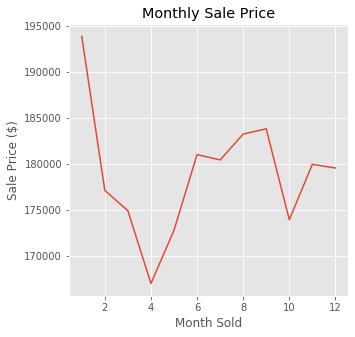

In [247]:
plt.figure(figsize=(5,5))
housing.groupby('MoSold').agg({'SalePrice':'mean'})['SalePrice'].plot()
plt.title('Monthly Sale Price')
plt.ylabel("Sale Price ($)")
plt.xlabel("Month Sold")
#Clear difference in price base on month sold

In [150]:
mo_sale = housing.groupby('MoSold').agg({'SalePrice':'mean'}).sort_values('SalePrice', ascending=False).reset_index()
mo_sale.index.names = ['DescOrder']
mo_sale

,MoSold,SalePrice
DescOrder,,
0,1,193856.227723
1,9,183824.374046
2,8,183253.896373
3,6,181035.041394
4,7,180449.995000
5,11,179970.948718
6,12,179577.244186
7,2,177146.308333
8,3,174941.899522


Text(0.5, 0, 'Order')

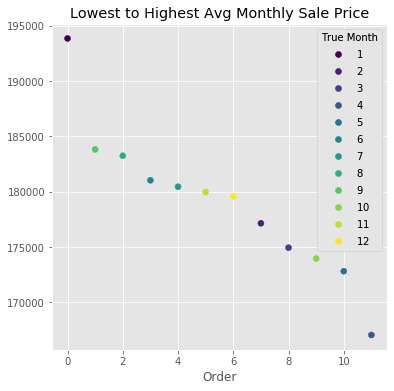

In [151]:
fig, ax = plt.subplots(figsize=(6,6))
scatter = ax.scatter(mo_sale.index, mo_sale['SalePrice'], c=mo_sale['MoSold'])
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="True Month")
ax.add_artist(legend1)
plt.title('Lowest to Highest Avg Monthly Sale Price')
plt.xlabel('Order')

**Conclusion:** We can create a re-ordered ordinal column for month and predict when the next best month to buy a house is. In addition, mortgage rates by month are not helpful, but mortgage rates are correlated with price on an annual basis. Unfortunately, the trend is in the opposite direction than we would expect, so it may not be useful.

### Analyzing Remodeling on Sale Price

In [445]:
housing.YearBuilt = housing.YearBuilt.astype(np.int64)

In [446]:
housing.YearBuilt.head()

1    1939
2    1984
3    1930
4    1900
5    2001
Name: YearBuilt, dtype: int64

In [451]:
housing1 = housing.loc[(housing['YearBuilt'] < 2010)]

Text(0.5, 0, 'Year Built')

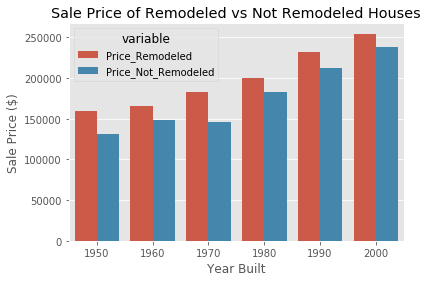

In [455]:
# look at average price per built decade without remodeling and compare with average price per built decade with remodeling
not_remodeled_price = housing1[housing1.YearRemodAdd==housing1.YearBuilt].groupby((housing1[housing1.YearRemodAdd==housing1.YearBuilt].YearBuilt//10)*10)['SalePrice'].mean().reset_index()
remodeled_price = housing1[housing1.YearRemodAdd!=housing1.YearBuilt].groupby((housing1[housing1.YearRemodAdd!=housing1.YearBuilt].YearBuilt//10)*10)['SalePrice'].mean().reset_index()
remodel_and_not = remodeled_price.merge(not_remodeled_price, how = 'right', on='YearBuilt').rename(columns={'SalePrice_x':'Price_Remodeled','SalePrice_y':'Price_Not_Remodeled'})
remodel_and_not = pd.melt(remodel_and_not,id_vars=['YearBuilt'])
sns.barplot(data = remodel_and_not, x='YearBuilt', y='value', hue='variable')
# group into the year built

plt.title('Sale Price of Remodeled vs Not Remodeled Houses')
plt.ylabel('Sale Price ($)')
plt.xlabel("Year Built")


## Compare Annual Sale Price with Mortgage Rates

In [9]:
FRM = pd.read_csv('data/mortgage_rates.csv')
FRM_2 = FRM.merge(housing.groupby(['YrSold','MoSold']).agg({'SalePrice':'mean'}), left_on=['Year', 'Month'], right_on=['YrSold','MoSold'])
FRM_1 = FRM.merge(housing.groupby(['YrSold']).agg({'SalePrice':'mean'}), left_on=['Year'], right_on=['YrSold'])



Text(0, 0.5, 'Monthly Average Sale Price')

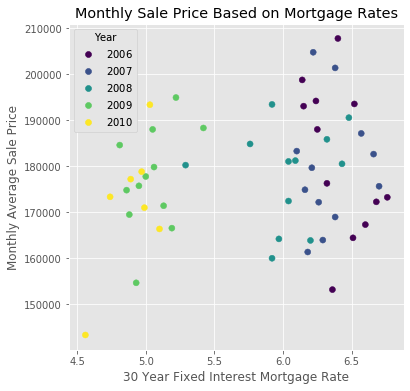

In [11]:
fig, ax = plt.subplots(figsize=(6,6))
scatter = plt.scatter(FRM_2['FRM'], FRM_2['SalePrice'], c=FRM_2['Year'])
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Year")
ax.add_artist(legend1)
plt.title('Monthly Sale Price Based on Mortgage Rates')
plt.xlabel('30 Year Fixed Interest Mortgage Rate')
plt.ylabel('Monthly Average Sale Price')

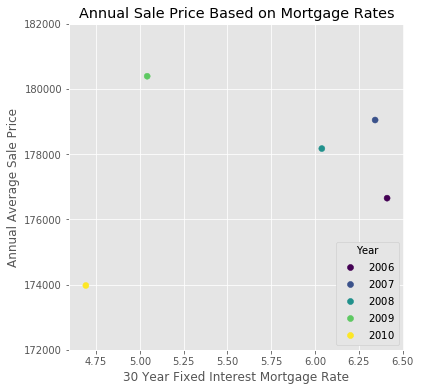

In [13]:
FRM2 = FRM_1.groupby('Year').agg({'SalePrice':'mean', 'FRM':'mean'})

fig, ax = plt.subplots(figsize = (6,6))
scatter = plt.scatter(FRM2['FRM'], FRM2['SalePrice'], c=list(FRM2.index))
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Year")
ax.add_artist(legend1)
plt.title('Annual Sale Price Based on Mortgage Rates')
plt.xlabel('30 Year Fixed Interest Mortgage Rate')
plt.ylabel('Annual Average Sale Price')
plt.ylim([172000,182000])
plt.show()

In [482]:
housing.groupby('YrSold').agg({'SalePrice':'mean'})

,SalePrice
YrSold,
2006,176649.310078
2007,179045.075000
2008,178170.021277
2009,180387.644444
2010,173971.666667


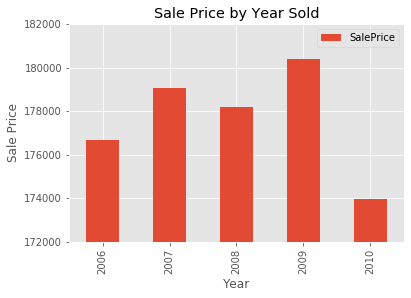

In [14]:
xy = housing.groupby('YrSold').agg({'SalePrice':'mean'})

xy.plot(kind ='bar')
plt.title('Sale Price by Year Sold')
plt.ylabel('Sale Price')
plt.xlabel('Year')
plt.ylim([172000,182000])
plt.show()

In [489]:
FRMx = FRM_1.groupby('Year').agg({'SalePrice':'mean'})

,SalePrice
Year,
2006,181819.513680
2007,179665.132055
2008,178197.671046
2009,177186.411930
2010,171936.643353


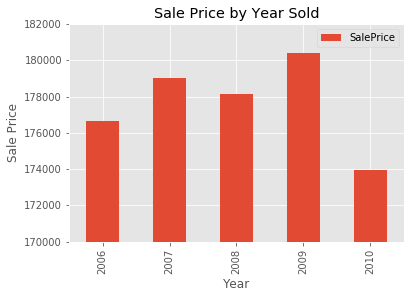

In [506]:
 #FRM['SalePrice'] FRM['Year']
FRMx = FRM_1.groupby('Year').agg({'SalePrice':'mean'})

FRMx.plot(kind ='bar')
plt.title('Sale Price by Year Sold')
plt.ylabel('Sale Price')
plt.ylim([170000,182000])
plt.show()

## Binary Feature Analysis on Sale Price 

In [158]:
housing['BeenRemod'] = np.where(housing.YearBuilt != housing.YearRemodAdd, 1, 0)
housing['HasFinBsmt'] = np.where(housing.BsmtFinSF1 > 0, 1, 0)
housing['HasFinGarage'] = np.where(housing.GarageFinish == "Fin", 1, 0)
housing['HasPool'] = np.where(housing.PoolArea > 0, 1, 0)
housing['HasFireplace'] = np.where(housing.Fireplaces > 0, 1, 0)
housing['PorchTotSF'] = housing.OpenPorchSF + housing.EnclosedPorch + housing['3SsnPorch'] + housing.ScreenPorch
housing['HasPorch'] = np.where(housing.PorchTotSF > 0, 1, 0)
housing['HasDeck'] = np.where(housing.WoodDeckSF > 0, 1, 0)

In [159]:
cols = ['BeenRemod', 'HasFinBsmt', 'HasFinGarage', 'HasPool', 'HasFireplace', 'HasPorch', 'HasDeck']

In [160]:
from scipy import stats
for col_ in cols:
    print('Does ' + col_ + ' have a significant effect?\n')
    print(housing.groupby(col_).agg({'SalePrice':['mean','std']})/1000)
    a = housing[housing[col_]==0].SalePrice
    b = housing[housing[col_]==1].SalePrice
    t, p = stats.ttest_ind(a, b)
    print('\nUsing a paired t-test, the t-score is %f, and the p value is %f \n' % (t,p))
    diff_ = (np.mean(b) - np.mean(a))/1000
    print('On average, houses with ' + col_ + ' are worth %.0f thousand more dollars.\n' % diff_)
    

Does BeenRemod have a significant effect?

            SalePrice           
                 mean        std
BeenRemod                       
0          181.818730  70.327479
1          173.679018  79.985448

Using a paired t-test, the t-score is 2.749892, and the p value is 0.006003 

On average, houses with BeenRemod are worth -8 thousand more dollars.

Does HasFinBsmt have a significant effect?

             SalePrice           
                  mean        std
HasFinBsmt                       
0           157.874156  63.300593
1           186.722482  77.988088

Using a paired t-test, the t-score is -9.091026, and the p value is 0.000000 

On average, houses with HasFinBsmt are worth 29 thousand more dollars.

Does HasFinGarage have a significant effect?

               SalePrice           
                    mean        std
HasFinGarage                       
0             160.967441  60.446614
1             231.925248  89.751689

Using a paired t-test, the t-score is -22.443402,

**Conclusion:** All of these features are significantly related to the sale price. Are they correlated?

In [161]:
corr = pd.concat([housing[cols], housing['SalePrice']], axis=1).corr()
corr

,BeenRemod,HasFinBsmt,HasFinGarage,HasPool,HasFireplace,HasPorch,HasDeck,SalePrice
BeenRemod,1.000000,-0.134847,-0.056864,-0.041715,0.020335,0.108918,-0.043444,-0.054091
HasFinBsmt,-0.134847,1.000000,0.072421,-0.004237,0.094915,-0.058379,0.093301,0.176279
HasFinGarage,-0.056864,0.072421,1.000000,0.028187,0.286452,0.133369,0.229059,0.404356
HasPool,-0.041715,-0.004237,0.028187,1.000000,0.043832,-0.003570,0.034939,0.061433
HasFireplace,0.020335,0.094915,0.286452,0.043832,1.000000,0.227131,0.219110,0.480091
HasPorch,0.108918,-0.058379,0.133369,-0.003570,0.227131,1.000000,0.041108,0.291260
HasDeck,-0.043444,0.093301,0.229059,0.034939,0.219110,0.041108,1.000000,0.309008
SalePrice,-0.054091,0.176279,0.404356,0.061433,0.480091,0.291260,0.309008,1.000000


**Conclusion:** Sales Price has a moderate correlation w HasFireplace and HasFinGarage, weak corr and w HasPorch and HasDeck

## Analysis of Quality 

In [335]:
quality = housing.copy()

In [336]:
#checking correlation between all features and target (sale price)
#overall quality highest correlated
#overall condition in the least 3 correlated

correlations = quality[quality.columns[1:]].corr()['SalePrice'][:]
correlations.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790501
GrLivArea        0.719981
TotalBsmtSF      0.652222
1stFlrSF         0.642613
GarageCars       0.638801
GarageArea       0.634992
YearBuilt        0.544370
FullBath         0.534982
GarageYrBlt      0.520763
YearRemodAdd     0.514309
MasVnrArea       0.500964
TotRmsAbvGrd     0.490219
Fireplaces       0.488184
BsmtFinSF1       0.460792
LotFrontage      0.358577
WoodDeckSF       0.333232
OpenPorchSF      0.306540
BsmtFullBath     0.291080
HalfBath         0.285875
LotArea          0.274443
2ndFlrSF         0.263144
BsmtUnfSF        0.167519
BedroomAbvGr     0.151806
ScreenPorch      0.121463
3SsnPorch        0.031260
PoolArea         0.030844
BsmtFinSF2       0.022520
MoSold           0.012591
YrSold          -0.001376
MiscVal         -0.018877
LowQualFinSF    -0.030835
BsmtHalfBath    -0.033802
MSSubClass      -0.084587
OverallCond     -0.101091
KitchenAbvGr    -0.113977
EnclosedPorch   -0.123235
Name: SalePrice, dtype: float64

In [337]:
sale_log = np.log10(quality['SalePrice'])

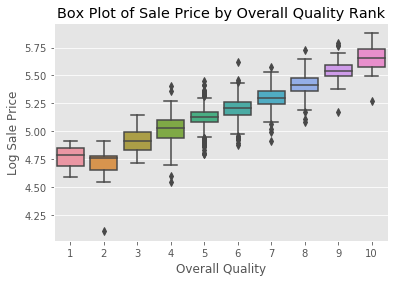

In [459]:
sns.boxplot(x='OverallQual', y=sale_log, data=housing)


plt.title("Box Plot of Sale Price by Overall Quality Rank")
plt.xlabel("Overall Quality")
plt.ylabel("Log Sale Price")
plt.show()

In [166]:
# Creating a quality only dataframe
only_quality = quality.filter(regex='Qual$|Qu$|QC$|Fence$|Type1$|Type2$')
only_quality.isnull().sum(axis=0)
only_quality = only_quality.replace(np.nan, 0)
only_quality = only_quality.replace({"Po":1, "Fa":2, "TA":3, "Gd":4,\
                                     "Ex":5})
only_quality = only_quality.replace({"Unf":1, "LwQ":2,\
                                     "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6})
only_quality = only_quality.drop('Fence', 1)

In [167]:
from sklearn.linear_model import LinearRegression
continuous_features = ['ExterQual', 'BsmtQual', 'BsmtFinType1',\
                       'BsmtFinType2', 'HeatingQC', 'KitchenQual',\
                       'FireplaceQu', 'GarageQual', 'PoolQC']
scores = {}
ols4 = LinearRegression()
from sklearn.metrics import r2_score
for feature_name in continuous_features:
                df2     = only_quality.copy()
                feature = df2[feature_name].copy()
                df2.drop(feature_name, axis=1, inplace=True)
                ols4.fit(df2, feature)
                scores[feature_name] = ols4.score(df2, feature)    

Text(0.5, 1.0, '$R^2$ of a continuous feature against the other features')

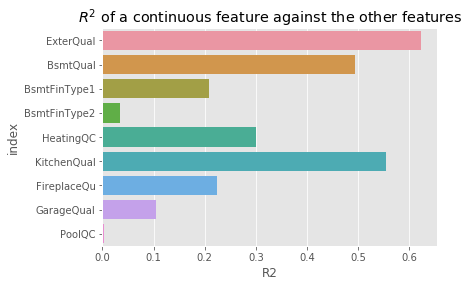

In [168]:
sns.barplot(x='R2', y='index', data=pd.DataFrame(scores, index=['R2'])\
            .T.reset_index())
plt.title('$R^2$ of a continuous feature against the other features')

In [169]:
only_quality[['OverallQual']+['ExterQual', 'BsmtQual', 'BsmtFinType1',\
                              'BsmtFinType2','HeatingQC','KitchenQual',\
                              'FireplaceQu','GarageQual','PoolQC']].corr()

,OverallQual,ExterQual,BsmtQual,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,PoolQC
OverallQual,1.000000,0.714085,0.622998,0.293914,-0.001121,0.441285,0.653743,0.466695,0.290455,0.026078
ExterQual,0.714085,1.000000,0.544884,0.258688,-0.013605,0.500316,0.697743,0.334523,0.207424,0.024423
BsmtQual,0.622998,0.544884,1.000000,0.440736,0.115553,0.393713,0.490431,0.289751,0.200149,-0.004088
BsmtFinType1,0.293914,0.258688,0.440736,1.000000,0.093068,0.167707,0.265547,0.124405,0.178585,-0.003114
BsmtFinType2,-0.001121,-0.013605,0.115553,0.093068,1.000000,-0.023023,-0.009335,-0.013758,0.071155,0.017877
HeatingQC,0.441285,0.500316,0.393713,0.167707,-0.023023,1.000000,0.481260,0.196599,0.128300,-0.006233
KitchenQual,0.653743,0.697743,0.490431,0.265547,-0.009335,0.481260,1.000000,0.315236,0.201239,0.031693
FireplaceQu,0.466695,0.334523,0.289751,0.124405,-0.013758,0.196599,0.315236,1.000000,0.207576,0.020789
GarageQual,0.290455,0.207424,0.200149,0.178585,0.071155,0.128300,0.201239,0.207576,1.000000,0.028308
PoolQC,0.026078,0.024423,-0.004088,-0.003114,0.017877,-0.006233,0.031693,0.020789,0.028308,1.000000


Text(0.5, 1.0, 'Feature Importance to Overall Quality')

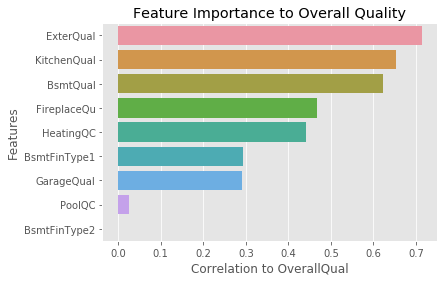

In [330]:
features = ['ExterQual','BsmtQual','BsmtFinType1','BsmtFinType2',\
            'HeatingQC','KitchenQual','FireplaceQu','GarageQual','PoolQC']
corr = only_quality[['OverallQual'] + features].corr()

corr = corr.sort_values('OverallQual', ascending=False)
sns.barplot( corr.OverallQual[1:], corr.index[1:], orient='h')
plt.xlabel("Correlation to OverallQual")
plt.ylabel("Features")
plt.title("Feature Importance to Overall Quality")

### How Does Price/SqrFt Play a Role in Housing Data Analytics?

In [171]:
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression

In [172]:
price        = housing['SalePrice']
size_related = housing.filter(regex='SF$|Area$')
size_related.head()

,GrLivArea,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,PorchTotSF
1,856,7890,0.0,618.0,856.0,856,0,0,399.0,0,0,0,166
2,1049,4235,149.0,104.0,1049.0,1049,0,0,266.0,0,105,0,105
3,1001,6060,0.0,100.0,837.0,1001,0,0,216.0,154,0,0,128
4,1039,8146,0.0,405.0,405.0,717,322,0,281.0,0,0,0,279
5,1665,8400,0.0,167.0,810.0,810,855,0,528.0,0,45,0,45


In [173]:
size_related.isnull().sum(axis=0)

GrLivArea       0
LotArea         0
MasVnrArea      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
PoolArea        0
PorchTotSF      0
dtype: int64

### Performing Unary Feature Selection

In [174]:
size_related = size_related.fillna(0.0)  # We fill the very minor missing values by 0.0
F_values, p_values = f_regression(size_related, housing['SalePrice'])

pd.Series(p_values, index=size_related.columns).sort_values()

GrLivArea        0.000000e+00
TotalBsmtSF     8.439132e-313
1stFlrSF        2.049975e-300
GarageArea      7.507245e-291
MasVnrArea      4.179944e-162
WoodDeckSF       5.792391e-68
OpenPorchSF      2.847805e-57
LotArea          8.746597e-46
2ndFlrSF         4.242748e-42
PorchTotSF       1.159921e-21
BsmtUnfSF        8.342658e-18
PoolArea         1.172888e-01
LowQualFinSF     1.175484e-01
dtype: float64

In [175]:
corr = pd.concat([size_related, housing['SalePrice']], axis=1).corr()
corr

,GrLivArea,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,PorchTotSF,SalePrice
GrLivArea,1.000000,0.260286,0.386041,0.246122,0.410456,0.539168,0.664967,0.088953,0.476107,0.247890,0.321950,0.057947,0.251975,0.719980
LotArea,0.260286,1.000000,0.103584,0.020047,0.222304,0.313097,0.022371,-0.000324,0.199195,0.155787,0.085048,0.052643,0.095504,0.274427
MasVnrArea,0.386041,0.103584,1.000000,0.080236,0.360684,0.361930,0.129587,-0.053828,0.347420,0.149846,0.118963,-0.003649,0.049467,0.498513
BsmtUnfSF,0.246122,0.020047,0.080236,1.000000,0.422121,0.303100,0.009823,0.048283,0.150629,-0.040559,0.116343,-0.032383,0.058665,0.168118
TotalBsmtSF,0.410456,0.222304,0.360684,0.422121,1.000000,0.784280,-0.219726,-0.025298,0.465294,0.224125,0.214012,0.009400,0.132039,0.652540
1stFlrSF,0.539168,0.313097,0.361930,0.303100,0.784280,1.000000,-0.264351,-0.009217,0.480197,0.224621,0.211434,0.076172,0.156212,0.642623
2ndFlrSF,0.664967,0.022371,0.129587,0.009823,-0.219726,-0.264351,1.000000,0.005958,0.126359,0.087288,0.183883,-0.000213,0.147383,0.263115
LowQualFinSF,0.088953,-0.000324,-0.053828,0.048283,-0.025298,-0.009217,0.005958,1.000000,-0.033245,-0.007573,-0.003394,-0.005241,0.042702,-0.030827
GarageArea,0.476107,0.199195,0.347420,0.150629,0.465294,0.480197,0.126359,-0.033245,1.000000,0.239895,0.216026,0.026977,0.106825,0.634706
WoodDeckSF,0.247890,0.155787,0.149846,-0.040559,0.224125,0.224621,0.087288,-0.007573,0.239895,1.000000,0.032444,0.080737,-0.079960,0.333332


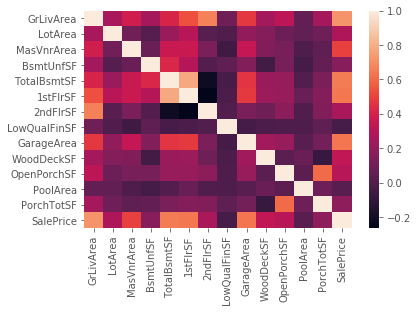

In [176]:
sns.heatmap(corr) #using seasborn imported above

### GrLivArea 

Most of the size related columns have significant p-values on their correlations with **SalePrice**. The **Gross Living Area** (GrLivArea) has a vanishing p-value, which indicates a very strong statistical relationship. We will focus our research on **GrLivArea**.


**question: what do they mean by vanishing p-value?**

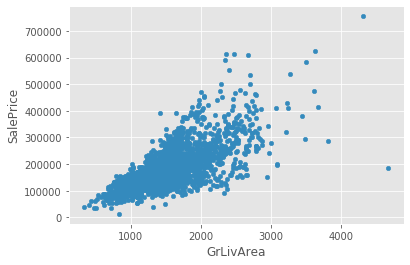

In [177]:
housing[['GrLivArea', 'SalePrice']].plot(kind='scatter', x='GrLivArea', y='SalePrice')


In [178]:
lm = LinearRegression()
grLivArea = size_related[['GrLivArea']]
lm.fit(grLivArea, price)
lm.score(grLivArea, price)

0.5183711142112821

In [179]:
lm.fit(np.log10(grLivArea), np.log10(price))
lm.score(np.log10(grLivArea), np.log10(price))

#slight better score with log of liv area

0.540066390354783

In [180]:
lm.intercept_, lm.coef_

(2.4423189330356907, array([0.88111154]))

# Linear Regression

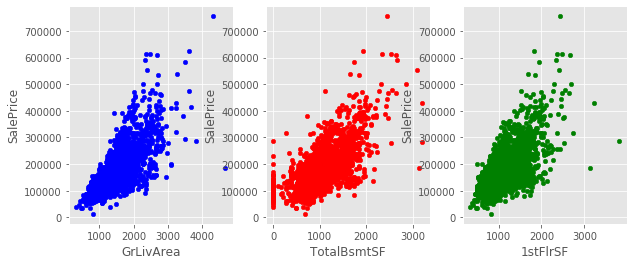

In [181]:
## load data into pandas dataframe
import pandas as pd
housing.head()
## Visualizing data, shown are Sales vs TV, Radio and Newspaper
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
housing.plot(ax=axes[0], kind='scatter', x='GrLivArea', y='SalePrice',c='b')
housing.plot(ax=axes[1], kind='scatter', x='TotalBsmtSF', y='SalePrice',c='r')
housing.plot(ax=axes[2], kind='scatter', x='1stFlrSF', y='SalePrice',c='g')
plt.show()

- GrLivArea, TotalBsmtSF, and 1stFlrSF all seem to have a positive linear relationship with sales price

In [182]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
## separate the input variables and output variables
X = housing[['GrLivArea', 'TotalBsmtSF']]  # input varialbe
Y = housing['SalePrice']  # output variable
ols.fit(X, Y)
print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))
print("R^2: %f" %(ols.score(X, Y)))

Intercept: -25700.362963
Coefficients: [83.49422388 76.89150007]
R^2: 0.671660


In [183]:
X = housing.filter(regex='SF$|Area$')
y = housing['SalePrice']

X.columns

Index(['GrLivArea', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'PoolArea', 'PorchTotSF'],
      dtype='object')

In [184]:
ols.fit(X, y)
print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))
print("R^2: %f" %(ols.score(X, y)))
# print("Predicted Sale Price: %f" %(ols.predict([[1486, 1036, 1145]])))

Intercept: -20816.479517
Coefficients: [ 32.42176586   0.18273133  51.81376248 -23.56263136  66.97282731
  30.26853424  33.65218061 -31.49894899  76.31645375  39.09395647
  59.63924748 -32.78913961 -10.21641342]
R^2: 0.756963


In [185]:
from sklearn.linear_model import LinearRegression 

ols = LinearRegression()

from sklearn.model_selection import train_test_split
# np.random.seed(100)  # changing the random seed can produce different scenarios which lead to exceptions
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)


ols.fit(X_train, y_train)

print("R^2 for train set: %f" %ols.score(X_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test, y_test))


R^2 for train set: 0.752815
--------------------------------------------------
R^2 for test  set: 0.767473


In [186]:
X_GL = housing[['GrLivArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']]  # input varialbe
Y_GL = housing['SalePrice']  # output variable
ols.fit(X_GL, Y_GL)

print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))
print("R^2: %f" %(ols.score(X_GL, Y_GL)))


Intercept: -24411.338907
Coefficients: [ 47.57421091 105.19086847  34.81395194 -92.4306095 ]
R^2: 0.615239


## Bathroom Analysis

Do home buyers value upstairs bathrooms and basement bathrooms equally? Do they price 'half-bath' as one half of a full bath? Based on your finding, how would you design an aggregate bathroom feature?
- 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'

‘Bathrooms’ = BsmtFullBath + BsmtHalfBath * 0.5 + FullBath + HalfBath * 0.5


‘Bathrooms’ = FullBath + HalfBath(0.5) + BsmtFullBath(.6) + BsmtHalfBath(0.2) 



In [190]:
## separate the input variables and output variables
X2 = housing[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']]  # input varialbe
y2 = housing['SalePrice']  # output variable

X2.head()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
1,1.0,0.0,1,0
2,1.0,0.0,2,0
3,0.0,0.0,1,0
4,0.0,0.0,1,0
5,1.0,0.0,2,1


In [191]:
ols.fit(X2, y2)
print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))


Intercept: 36248.405682
Coefficients: [46632.9473865  16377.01117954 69719.20079549 32713.74134136]


- 'BsmtFullBath', 46581.74 
- 'BsmtHalfBath', 16327.75
- 'FullBath', 69639.06
- 'HalfBath' 32755.75

In [193]:
housing['HalfBath2'] = housing['HalfBath'].fillna(0.0)*0.5
housing['BsmtFullBath2'] = housing['BsmtFullBath'].fillna(0.0)*.6 
housing['BsmtHalfBath2'] = housing['BsmtHalfBath'].fillna(0.0)*.2

In [195]:
housing['bathroom'] = housing['FullBath'] + housing['HalfBath2'] + housing['BsmtFullBath2'] + housing['BsmtHalfBath2']

#FullBath + HalfBath(0.5) + BsmtFullBath(.6) + BsmtHalfBath(0.2)



## Neighborhood Analysis

### Merging DataFrames and deleting duplicates

In [196]:
#adding separate long lat column

In [197]:
#making index a column 
realestate['MapRefNo'] = realestate.index

In [198]:
# creating a new dataframe with only necessary columns 
realestate1 = realestate[['MapRefNo', 'GeoRefNo', 'Prop_Addr', 'Neighborhood', 'ClassPr_S', 'SchD_S', 'TxD_S']]

In [199]:
#renamed realestate MapRefNo to PID to Merge on PID 
realestate1.rename(columns = {'MapRefNo':'PID'}, inplace = True) 


In [200]:
#Merging Dataframes on PID
real_housing= pd.merge(housing, realestate1, on = 'PID', how='left')

In [201]:
#dropping duplicates 
real_housing = real_housing.drop_duplicates(subset = ['PID'])
real_housing.shape #checking shape

(2579, 99)

In [202]:
#check for duplicates
sum(real_housing['PID'].value_counts() > 1)

0

In [203]:
# neighborhood_y based on sales price
real_housing.groupby('Neighborhood_y')['SalePrice'].mean()\
      .sort_values(ascending=False)


Neighborhood_y
HaydnLk    396717.050000
NoRidge    326114.298507
NRidgHt    313662.495868
Veenker    251263.043478
Timber     243523.346154
Somerst    228761.853147
Stonebr    225821.739130
ClearCr    216020.512821
Crawfor    202075.782609
CollgCr    198133.169492
Blmngtn    196237.173913
Greens     193531.250000
NW Ames    190372.398374
Gilbert    189439.867133
SawyerW    189178.803571
Mitchel    163443.203883
N Ames     145088.911765
Bluestm    143590.000000
NoPkVil    140743.181818
Sawyer     137492.863309
S&W ISU    132945.121951
Edwards    132040.619632
OldTown    126526.014423
BrkSide    126029.854369
IDOT&RR    110875.985915
Br'Dale    106094.827586
MeadowV     96836.470588
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Nieghborhood Distribution after merge')

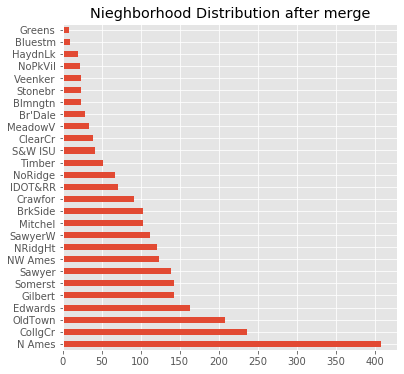

In [204]:
plt.figure(figsize=(6,6))
real_housing['Neighborhood_y'].value_counts().plot(kind='barh')
plt.title('Nieghborhood Distribution after merge')

In [263]:
# Getting dataframe with Lat and Long columns added using Geopy
lat_long_df = pd.read_pickle('./data/clean_Res_latlog.pkl')
lat_long_df.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood_x,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GeoRefNo,Prop_Addr,Neighborhood_y,ClassPr_S,SchD_S,TxD_S,address_lat_log,highschool_dist,college_dist,latitude,longitude
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,909176150.0,436 HAYWARD AVE,S&W ISU,RESIDENTIAL,1.0,1.0,"(42.01856448979592, -93.65161918367347)",1.748507,0.467930,42.018564,-93.651619
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,905476230.0,3416 WEST ST,Edwards,RESIDENTIAL,1.0,1.0,"(42.024855315930424, -93.66367099341755)",1.852690,0.749722,42.024855,-93.663671
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal,535377150.0,1524 DOUGLAS AVE,OldTown,RESIDENTIAL,1.0,1.0,"(42.03739146938776, -93.61220695918368)",1.152991,2.080107,42.037391,-93.612207
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,534177230.0,2304 FILLMORE AVE,NW Ames,RESIDENTIAL,1.0,1.0,"(42.04455376067282, -93.63181831620726)",0.316567,1.611707,42.044554,-93.631818
6,908128060,1922,198500,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,495,1427,0,0.0,0.0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2.0,672.0,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,908128060.0,4003 MARIGOLD DR,Edwards,RESIDENTIAL,1.0,1.0,"(42.01900877172312, -93.67298690279817)",2.477665,1.298492,42.019009,-93.672987


### Sale Price based on Neighborhood

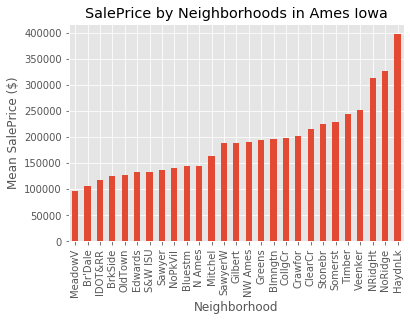

In [283]:
x2 = lat_long_df.groupby('Neighborhood_y')['SalePrice'].mean().sort_values(ascending=True)
x2.plot(kind ='bar')
plt.title('SalePrice by Neighborhoods in Ames Iowa')
plt.xlabel('Neighborhood')
plt.ylabel('Mean SalePrice ($)')
plt.show()

In [288]:
neigh = lat_long_df.groupby('Neighborhood_y').agg({"SalePrice":"mean"})\
      .sort_values(by = 'SalePrice', ascending=False)
neigh

,SalePrice
Neighborhood_y,
HaydnLk,396717.050000
NoRidge,326114.298507
NRidgHt,313662.495868
Veenker,251263.043478
Timber,243523.346154
Somerst,228761.853147
Stonebr,225821.739130
ClearCr,216020.512821
Crawfor,202075.782609


In [289]:
neigh['Neighborhood Rank'] = neigh.SalePrice.apply(lambda x: 1 if x >= 160000 else(0))


In [310]:
neigh

,SalePrice,Neighborhood Rank
Neighborhood_y,,
HaydnLk,396717.050000,1
NoRidge,326114.298507,1
NRidgHt,313662.495868,1
Veenker,251263.043478,1
Timber,243523.346154,1
Somerst,228761.853147,1
Stonebr,225821.739130,1
ClearCr,216020.512821,1
Crawfor,202075.782609,1


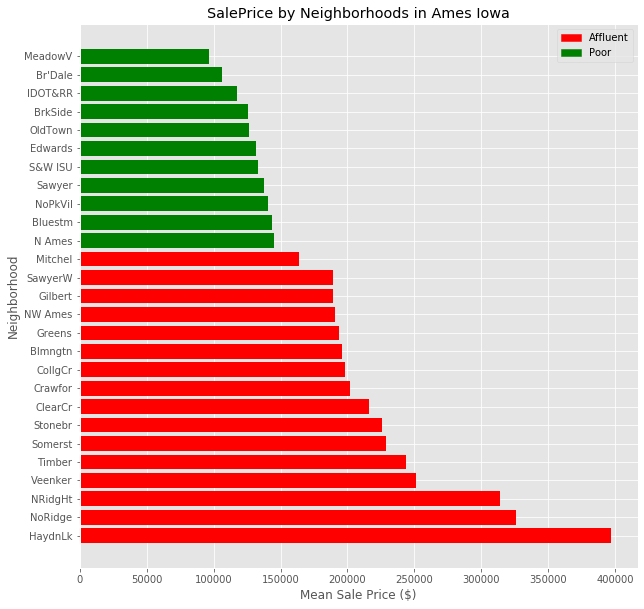

In [425]:
# neigh.plot(kind ='bar', color = neigh["Neighborhood Rank"].map({0:'g', 1: 'r'}))
# plt.title('SalePrice by Neighborhoods in Ames Iowa')
# plt.xlabel('Neighborhood')
# plt.ylabel('Mean SalePrice ($)')
# plt.show()

fig, ax = plt.subplots(figsize=(10,10))
barh = ax.barh(neigh.index, neigh['SalePrice'], color= neigh["Neighborhood Rank"].map({0:'g', 1: 'r'}))

plt.title('SalePrice by Neighborhoods in Ames Iowa')
plt.xlabel("Mean Sale Price ($)")
plt.ylabel('Neighborhood')

red_patch = mpatches.Patch(color='red', label='Affluent')
green_patch = mpatches.Patch(color='green', label='Poor')
plt.legend(handles =[red_patch, (green_patch)])

plt.show()

## Popularity of Type of house Based on Neighborhood 

In [265]:
# HouseStyle - CHANGE to binary 0 =ranch, 1 = colonial 
lat_long_df.HouseStyle = lat_long_df.HouseStyle.replace({'1.5Unf':0,'1.5Fin':0, 'SFoyer':1, 'SLvl':1, '1Story':0, '2.5Unf':1, '2Story':1, '2.5Fin':1})


In [266]:
lat_long_df.HouseStyle.sum()/2559

0.3841344275107464

In [267]:
lat_long_df.HouseStyle.mean()

0.3841344275107464

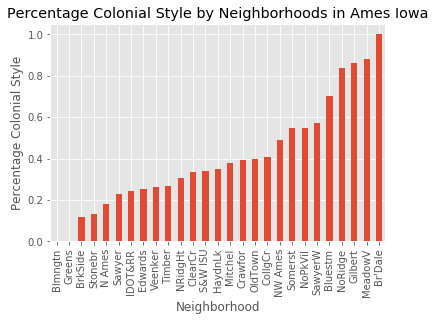

In [320]:
x1 = lat_long_df.groupby('Neighborhood_y').agg['HouseStyle'].mean().sort_values(ascending=True)
x1.plot(kind ='bar')
plt.title('Percentage Colonial Style by Neighborhoods in Ames Iowa')
plt.xlabel('Neighborhood')
plt.ylabel('Percentage Colonial Style')
plt.show()

In [326]:
x1 = lat_long_df.groupby('Neighborhood_y').agg({"SalePrice":"mean", "HouseStyle":"mean"})\
      .sort_values(by = 'HouseStyle', ascending=False)
x1['Neighborhood Rank'] = x1.SalePrice.apply(lambda x: 1 if x >= 160000 else(0))
x1


,SalePrice,HouseStyle,Neighborhood Rank
Neighborhood_y,,,
Br'Dale,106094.827586,1.000000,0
MeadowV,96836.470588,0.882353,0
Gilbert,189439.867133,0.860140,1
NoRidge,326114.298507,0.835821,1
Bluestm,143590.000000,0.700000,0
SawyerW,189178.803571,0.571429,1
Somerst,228761.853147,0.545455,1
NoPkVil,140743.181818,0.545455,0
NW Ames,190372.398374,0.487805,1


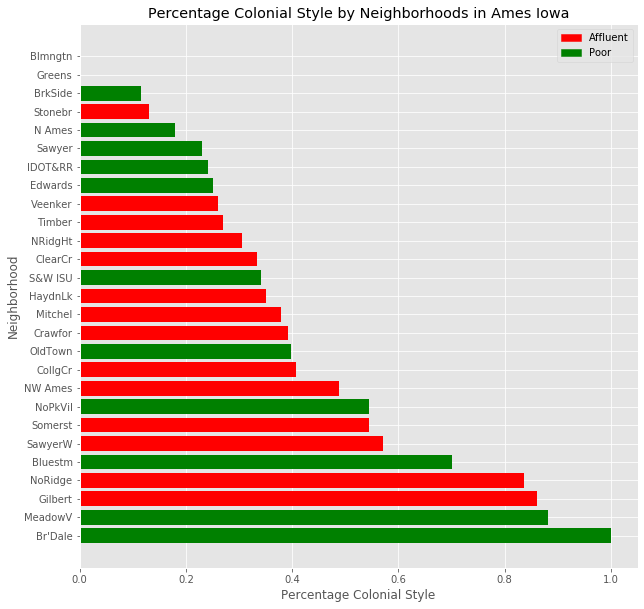

In [424]:
fig, ax = plt.subplots(figsize=(10,10))
barh = ax.barh(x1.index, x1['HouseStyle'], color= x1["Neighborhood Rank"].map({0:'g', 1: 'r'}))

plt.title('Percentage Colonial Style by Neighborhoods in Ames Iowa')
plt.xlabel("Percentage Colonial Style")
plt.ylabel('Neighborhood')

red_patch = mpatches.Patch(color='red', label='Affluent')
green_patch = mpatches.Patch(color='green', label='Poor')
plt.legend(handles =[red_patch, (green_patch)])

plt.show()

## Sale Price based on Distance to College

In [275]:
df_d = lat_long_df.loc[(lat_long_df['college_dist']<6000)]

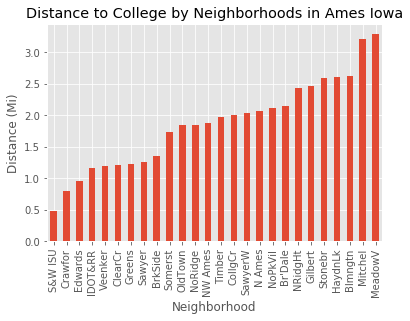

In [270]:
x3 = df_d.groupby('Neighborhood_y')['college_dist'].mean().sort_values(ascending=True)
x3.plot(kind ='bar')
plt.title('Distance to College by Neighborhoods in Ames Iowa')
plt.xlabel('Neighborhood')
plt.ylabel('Distance (Mi)')
plt.show()

In [342]:
x3 = df_d.groupby('Neighborhood_y').agg({"SalePrice":"mean", 'college_dist':"mean"})\
      .sort_values(by = 'college_dist', ascending=False)
x3['Neighborhood Rank'] = x3.SalePrice.apply(lambda x: 1 if x >= 160000 else(0))
x3

,SalePrice,college_dist,Neighborhood Rank
Neighborhood_y,,,
MeadowV,96836.470588,3.285092,0
Mitchel,163443.203883,3.213016,1
Blmngtn,196237.173913,2.623709,1
HaydnLk,385811.250000,2.612580,1
Stonebr,227352.380952,2.591617,1
Gilbert,189439.867133,2.468183,1
NRidgHt,325783.290909,2.440269,1
Br'Dale,106094.827586,2.147831,0
NoPkVil,140743.181818,2.112906,0


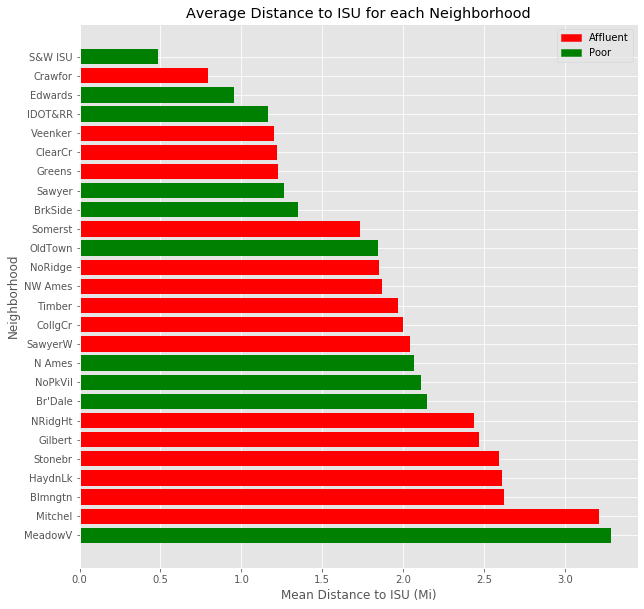

In [429]:
fig, ax = plt.subplots(figsize=(10,10))
barh = ax.barh(x3.index, x3['college_dist'], color= x3["Neighborhood Rank"].map({0:'g', 1: 'r'}))

plt.title('Average Distance to ISU for each Neighborhood')
plt.xlabel("Mean Distance to ISU (Mi)")
plt.ylabel('Neighborhood')


red_patch = mpatches.Patch(color='red', label='Affluent')
green_patch = mpatches.Patch(color='green', label='Poor')
plt.legend(handles =[red_patch, (green_patch)])

plt.show()

In [376]:
lat_long_df['Neighborhood Rank'] = lat_long_df.SalePrice.apply(lambda x: 1 if x >= 160000 else(0))


In [377]:
lat_long_df['Neighborhood Rank'].value_counts()

1    1286
0    1273
Name: Neighborhood Rank, dtype: int64

In [382]:
qual_neigh = lat_long_df.groupby('Neighborhood_y').agg({"SalePrice":"median", "OverallQual": "mean", "Neighborhood Rank": "mean"})\
      .sort_values(by = 'SalePrice', ascending=False)
qual_neigh

,SalePrice,OverallQual,Neighborhood Rank
Neighborhood_y,,,
HaydnLk,374963,8.650000,1.000000
NoRidge,302000,7.910448,1.000000
NRidgHt,300000,8.214876,0.983471
Veenker,255000,7.173913,0.956522
Somerst,223000,7.384615,0.916084
Timber,220000,7.038462,0.980769
Stonebr,213500,7.913043,0.956522
ClearCr,211000,6.051282,0.897436
CollgCr,199450,6.627119,0.733051


In [391]:
qual_neigh['Neighborhood Rank'] = qual_neigh.SalePrice.apply(lambda x: 'Affluent' if x >= 160000 else('Poor'))


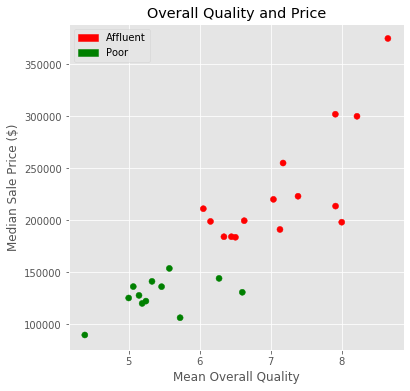

In [427]:
fig, ax = plt.subplots(figsize=(6,6))
scatter = ax.scatter(qual_neigh['OverallQual'], qual_neigh['SalePrice'], c=qual_neigh['Neighborhood Rank'].map({'Poor':'g', 'Affluent': 'r'}))


plt.title('Overall Quality and Price')
plt.xlabel('Mean Overall Quality')
plt.ylabel("Median Sale Price ($)")

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# red_dot, = plt.plot(ax, "ro", markersize=10)
# green_dot, = plt.plot(ax, "green", markersize=10)
# plt.legend(handles =[red_patch, (green_patch)])['Affluent','Poor']

red_patch = mpatches.Patch(color='red', label='Affluent')
green_patch = mpatches.Patch(color='green', label='Poor')
plt.legend(handles =[red_patch, (green_patch)])



# KNN

In [220]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [221]:
clean_df = pd.read_pickle('./data/clean_df.pkl')

In [222]:
clean_df = clean_df.dropna(subset=['latitude', 'longitude'])
clean_df.shape

(2549, 47)

In [223]:
#removing outliers from GrLivArea & LotArea & TotalBsmtSF
clean_df = clean_df.loc[(clean_df['GrLivArea']<4000) & (clean_df['LotArea']<100000)\
                        & (clean_df['TotalBsmtSF']<3000) & (clean_df['SalePrice'] < 500000)]

In [224]:
clean_df['SalePriceLog'] = np.log10(clean_df['SalePrice'])
clean_df['SalePriceLog'] = clean_df['SalePriceLog'].astype(np.int64)

(array([ 233., 1587.,  543.,  136.,   40.]),
 array([ 12789., 106045., 199301., 292557., 385813., 479069.]),
 <a list of 5 Patch objects>)

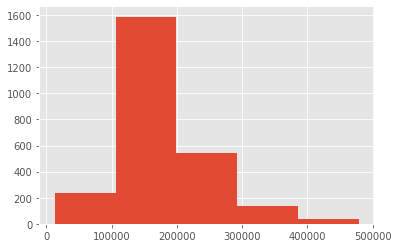

In [225]:
plt.hist(clean_df['SalePrice'], bins= 5)

In [231]:
clean_df['SalePrice'].median()

159900.0

In [227]:
clean_df['SalePrice2'] = clean_df.SalePrice.apply(lambda x: "Affluent" if x >= 160000 else("Poor"))
    
    

In [228]:
clean_df['SalePrice2'].value_counts()

Poor        1272
Affluent    1267
Name: SalePrice2, dtype: int64

In [361]:
#preprocessing
X = np.array([clean_df["latitude"], clean_df['longitude']])
             
y = clean_df["SalePrice"]

In [362]:
X.shape

(2, 2539)

In [363]:
y.shape

(2539,)

In [364]:
X = X.transpose()

In [365]:
X.shape

(2539, 2)

In [366]:
#train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# X_train, X_test, y_train, y_test,  = train_test_split(X,y,test_size=1/3, random_state=0) 


In [367]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [368]:
#training
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=5)

regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [373]:
#predict
print(regressor.score(X_train, y_train))
regressor.score(X_test, y_test)

0.7365429219146655


0.6537083022284644